In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import tree


**[FILLOUT] Specify the CSV file name that you want to use for further analysis**  <br>
*DELETE THIS TEXT SECTION BEFORE SUBMITTING*

In [ ]:
csv_file_name = "test.csv"


In [ ]:
df = pd.read_csv( csv_file_name )

df.head(3)

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid
0,40-54,18.895,alive,airbag,belted,0,m,25,2002,2000.0,deploy,pass,1,81:99:1
1,25-39,266.532,alive,none,none,1,f,28,2001,1991.0,unavail,driver,0,76:12:2
2,25-39,51.810,alive,airbag,belted,1,f,36,1999,1994.0,deploy,driver,1,78:53:2


In [ ]:
target_column_name = "dead"

In [ ]:
categorical_target_column = True
#categorical_target_column = False


In [ ]:
#Find out number of rows and columns
print(f'Total Number of Rows : {df.shape[0]}')
print(f'Total Number of Columns : {df.shape[1]}')

Total Number of Rows : 8652
Total Number of Columns : 14


In [ ]:
if categorical_target_column :
  print( df[target_column_name].value_counts() )

alive    8249
dead      403
Name: dead, dtype: int64


OBSERVATION

---

There are total 8652 data points in this dataset . Among which 8249 data points belong to class "0" (alive) and other 403 data points belong to class "1" (dead) .
This indicates that in the dataset the data points are not equally distributed among the classes.

*This is just a sample analysis. Modify and rewrite the sample text according to your dataset*

Text(0.5, 1.0, 'Total Number of Null values for Each Column')

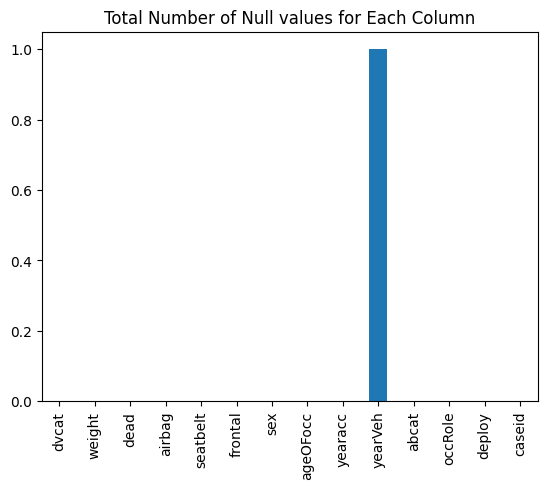

In [ ]:
df.isnull().sum().plot(kind='bar')
plt.title("Total Number of Null values for Each Column")


In [ ]:
#Find out the percentages of null value cout for each column
( df.isnull().sum()/len(df) ) *100


dvcat       0.000000
weight      0.000000
dead        0.000000
airbag      0.000000
seatbelt    0.000000
frontal     0.000000
sex         0.000000
ageOFocc    0.000000
yearacc     0.000000
yearVeh     0.011558
abcat       0.000000
occRole     0.000000
deploy      0.000000
caseid      0.000000
dtype: float64

OBSERVATION

---


Most of the data points from the column "yearVeh" are missing. As **11%** of the data points are missing , the column cannot be taken in consideration for further analysis.


*This is just a sample analysis. Modify and rewrite the sample text according to your dataset*

In [ ]:
droped_column_names = [ "dvcat","yearVeh","caseid","weight"]

df.drop( droped_column_names , axis = 1 ,inplace = True)

In [ ]:
# If total number of missing value is less than 5% then drop it otherwise fill using backward fill/forward fill.

print(f'Maximum Null values in column (Before Handling)  : { df.isnull().sum().max() }')

if (df.isnull().sum().max() > len(df) ) * 0.05:
  print("\n------Dropped Null Values-------\n")
  df.dropna( inplace = True)
else:
  print("\n------Replaced Null Values-------\n")
  df.fillna( method = 'bfill' , inplace = True) # You can use 'ffill' to forward fill


print(f'Maximum Null values in column (After Handling)  : { df.isnull().sum().max() }')



Maximum Null values in column (Before Handling)  : 0

------Replaced Null Values-------

Maximum Null values in column (After Handling)  : 0


In [ ]:
#Duplicate entry count
df.duplicated().value_counts()

print( ( df.duplicated().value_counts()/len(df) ) * 100)

False    63.095238
True     36.904762
dtype: float64


OBSERVATION

---
There are 0.44 % duplicate entries in this data set


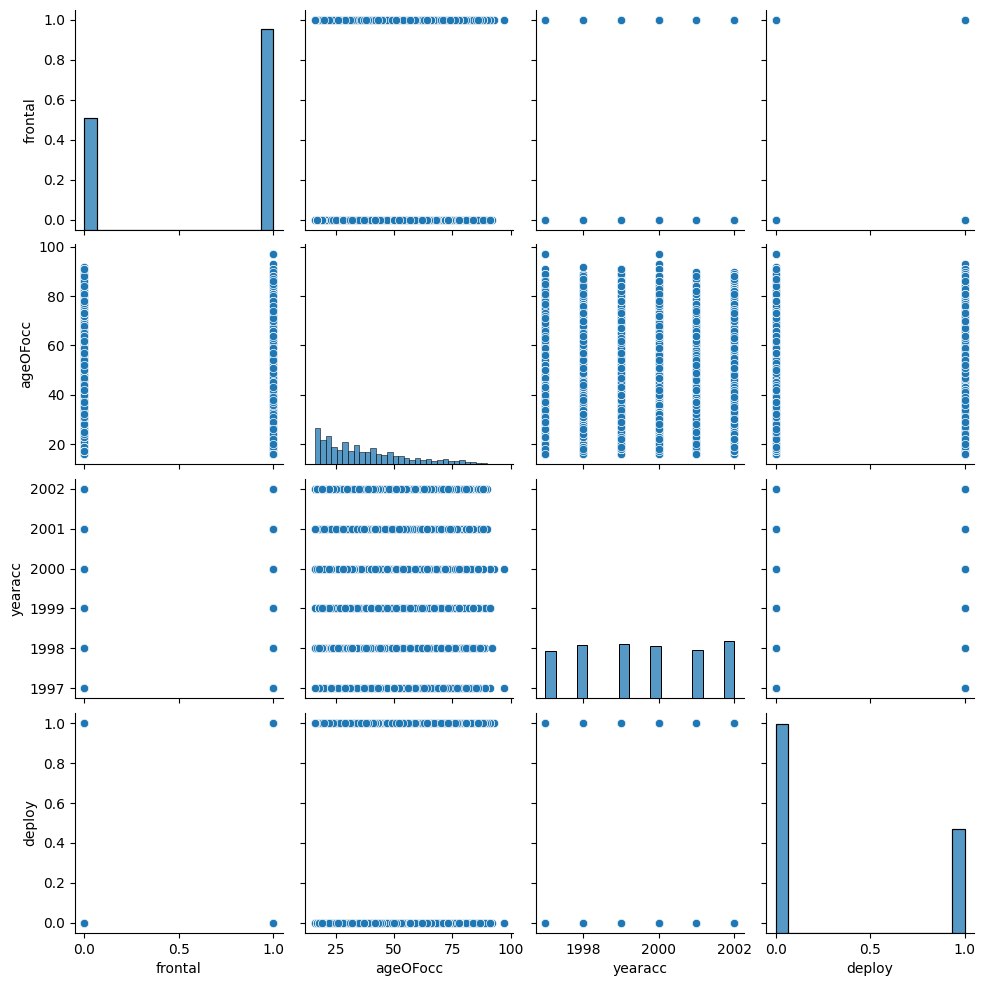

In [ ]:
#Pair Plot Gives you an overall insight on how the data's are distributed
sns.pairplot( df )

OBSERVATION

---
From the pair plot above some of the observations are :-   

1.    **ageOFocc** : From the histogram analysis it can be observed that the graph is mosthy right skewed.

2.   **frontal** : left-skewed.

3.  **yearacc** : Symetric.

4.   **deploy** : Right-skewed.


 *This is just a sample analysis shown . You have to write all the observations you found* .




In [ ]:
df.info()

print("\n\n-----------------Unique Values per column--------------------------------\n\n")

df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8652 entries, 0 to 8651
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   dead      8652 non-null   object
 1   airbag    8652 non-null   object
 2   seatbelt  8652 non-null   object
 3   frontal   8652 non-null   int64 
 4   sex       8652 non-null   object
 5   ageOFocc  8652 non-null   int64 
 6   yearacc   8652 non-null   int64 
 7   abcat     8652 non-null   object
 8   occRole   8652 non-null   object
 9   deploy    8652 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 676.1+ KB


-----------------Unique Values per column--------------------------------




dead         2
airbag       2
seatbelt     2
frontal      2
sex          2
ageOFocc    79
yearacc      6
abcat        3
occRole      2
deploy       2
dtype: int64

In [ ]:
categorical_columns = [ "dead" , "airbag","seatbelt","sex","abcat","occRole"]
numeric_columns = ["frontal" , "ageOFocc" , "yearacc" ,"deploy"]

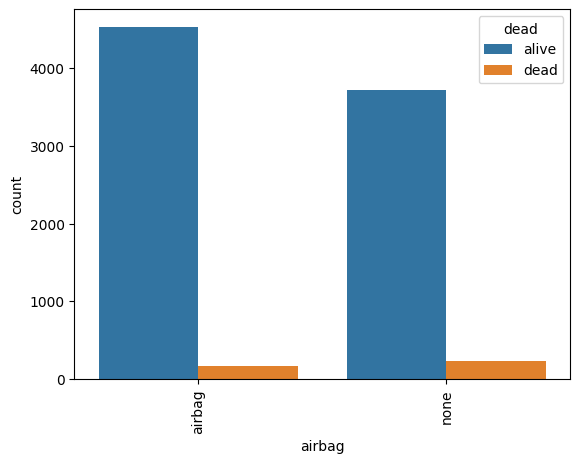

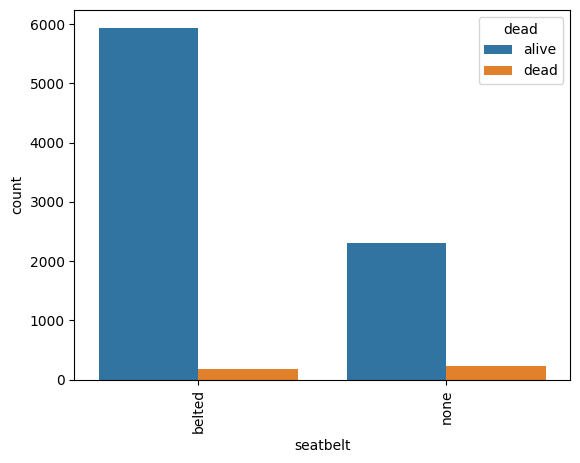

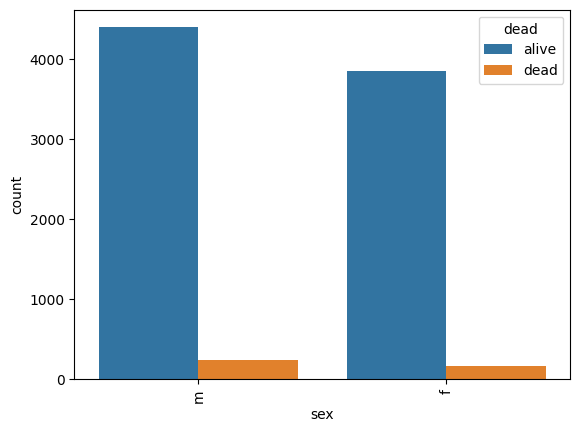

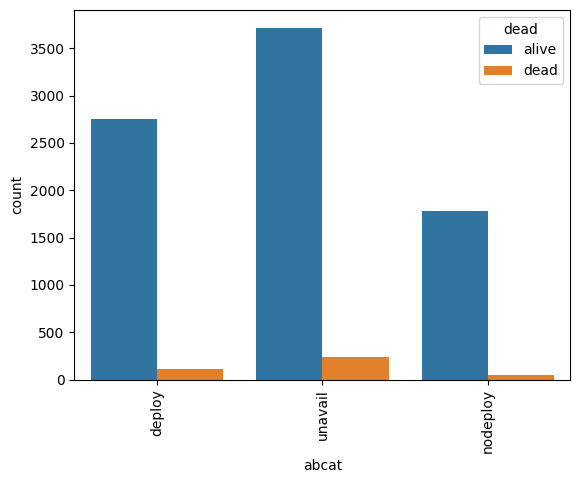

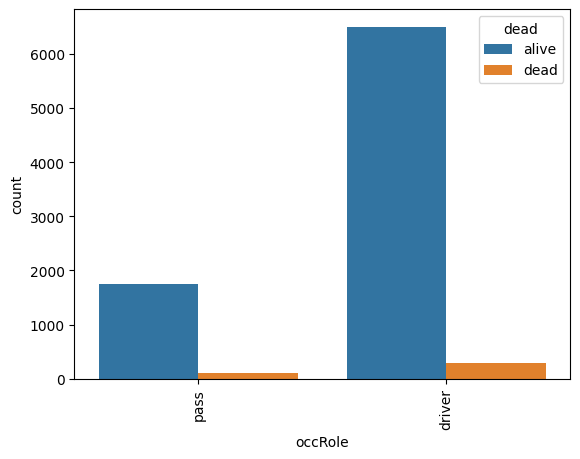

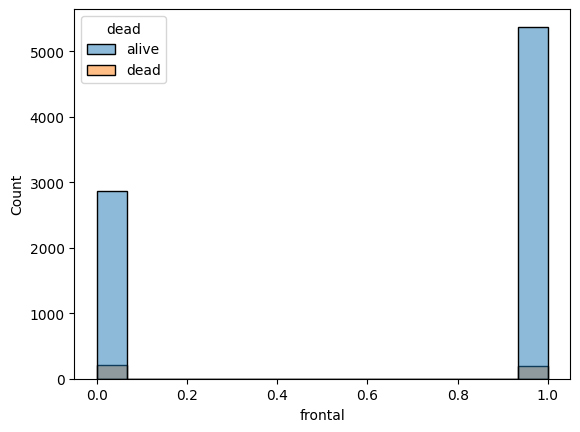

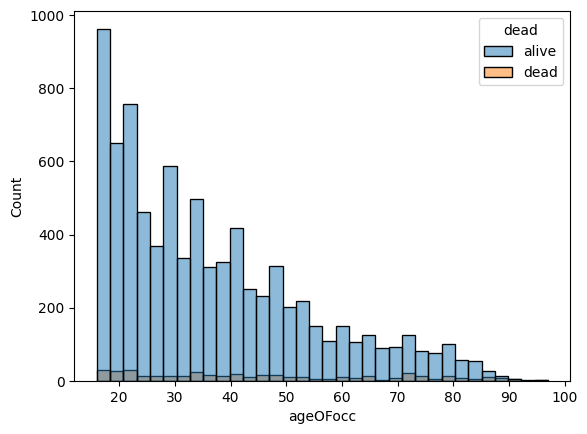

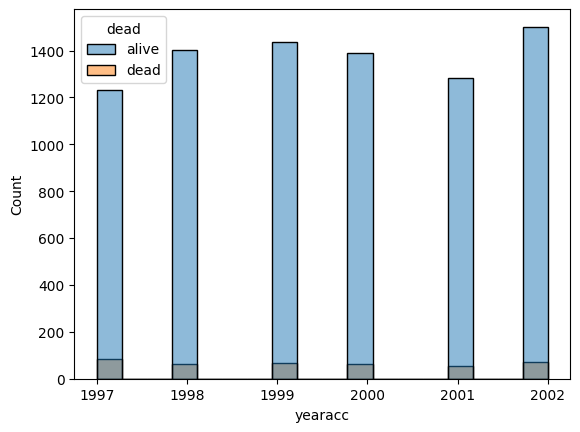

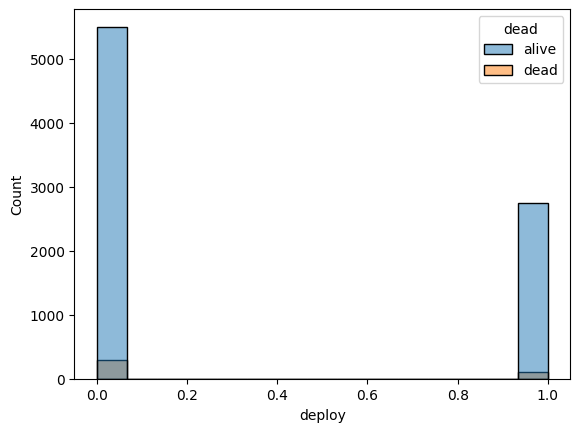

In [ ]:
if categorical_target_column:
  for column in categorical_columns:
    if column != target_column_name:
      plt.xticks(rotation=90)
      #sns.barplot(x=column, y='Counts', hue= target_column_name, data= df.groupby([column, target_column_name]).size().reset_index(name="Counts"))
      sns.countplot( x = column , hue = target_column_name , data = df )
      plt.show()

  for column in numeric_columns:
    if column != target_column_name:
      sns.histplot( x = column , hue = target_column_name , data = df)
      plt.show()

else:
  for column in categorical_columns:
      if column != target_column_name:
        sns.histplot( x = target_column_name , hue = column , data = df)
        plt.show()

  for column in numeric_columns:
    if column != target_column_name:
      sns.scatterplot( x = target_column_name , y = column , data = df)
      plt.show()



OBSERVATION

---


1.   **dead and airbag**: From the count plot it can be observed that number of alive is high in airbag portion and low in none.

2.  **dead and seatbelt** : Analysis reveals that a higher proportion of belted people are alive and none seatbelt most of thrm are dead.

3. **dead and sex** : Males are survived then females.

4. **dead and abcat** : unalive is greater.

5. **dead and occRole** : Hrere it seems that most of the time drivers survives more then passenger.


 *This is just a sample analysis shown . You have to write all the observations you found* .


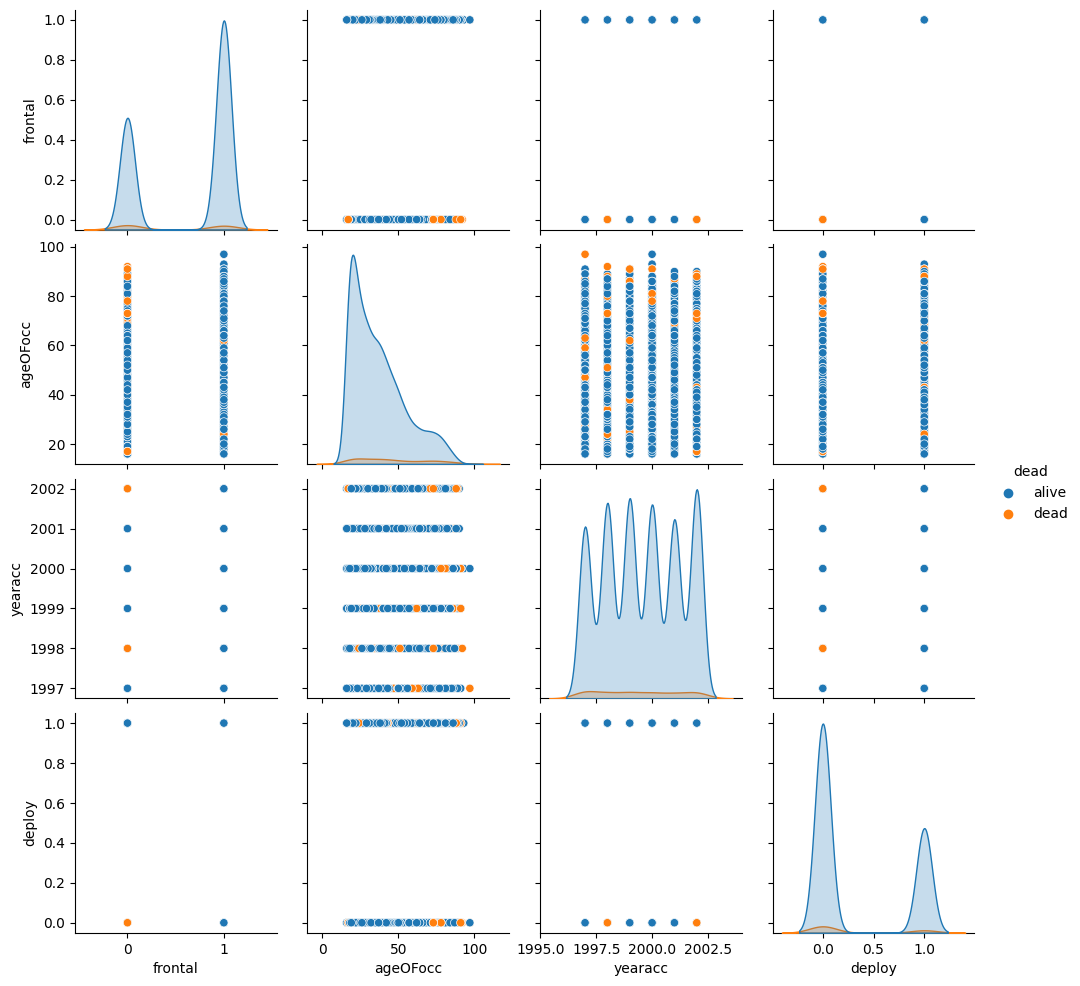

In [ ]:
if categorical_target_column:
  sns.pairplot( data=df , hue = target_column_name)

OBSERVATION

---

 *You have to write all the observations you found* .

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8652 entries, 0 to 8651
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   dead      8652 non-null   object
 1   airbag    8652 non-null   object
 2   seatbelt  8652 non-null   object
 3   frontal   8652 non-null   int64 
 4   sex       8652 non-null   object
 5   ageOFocc  8652 non-null   int64 
 6   yearacc   8652 non-null   int64 
 7   abcat     8652 non-null   object
 8   occRole   8652 non-null   object
 9   deploy    8652 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 676.1+ KB


<Axes: >

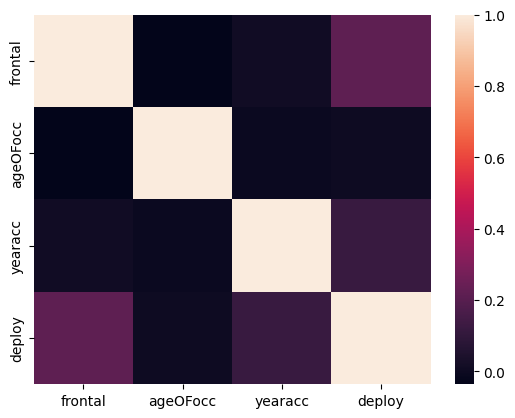

In [ ]:
#Correlation HeatMap for numeric columns among the dataset
sns.heatmap(df.corr( numeric_only =  True))

OBSERVATION

---

A strong negative correlation has been observed between the "ageOFocc" and "deploy" columns. This indicates that as the values in "ageOFocc" increase, the corresponding deploy tend to decrease. Relation between frontal and deploy are greatest value.


 *This is just a sample analysis shown . You have to write all the observations you found* .



Features and labels are stored in different variables. Categorical columns are encoded using OrdinalEncoder .

In [ ]:
X = df.drop(target_column_name , axis=1 )
y =  df[target_column_name]

enc = OrdinalEncoder()
X = enc.fit_transform( X )


le = LabelEncoder()
target_class = y.unique()
y = le.fit_transform( y )


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2484
           1       0.00      0.00      0.00       112

    accuracy                           0.96      2596
   macro avg       0.48      0.50      0.49      2596
weighted avg       0.92      0.96      0.94      2596



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


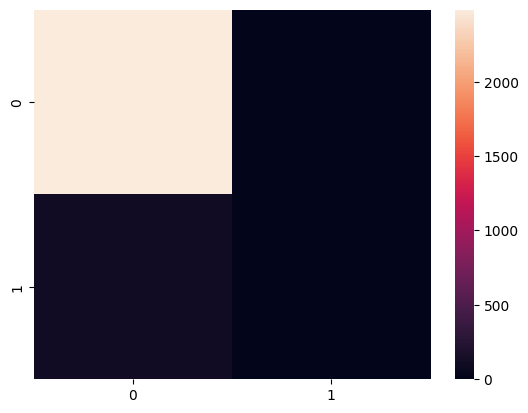

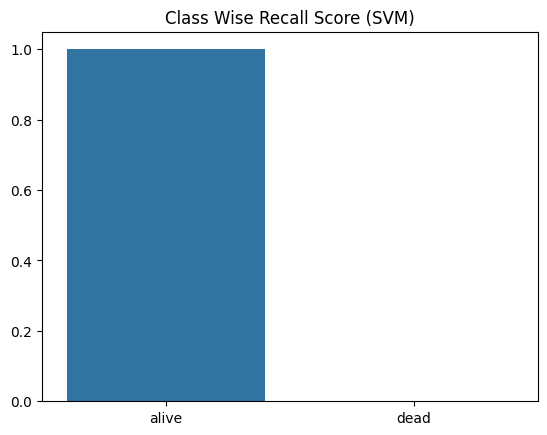

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


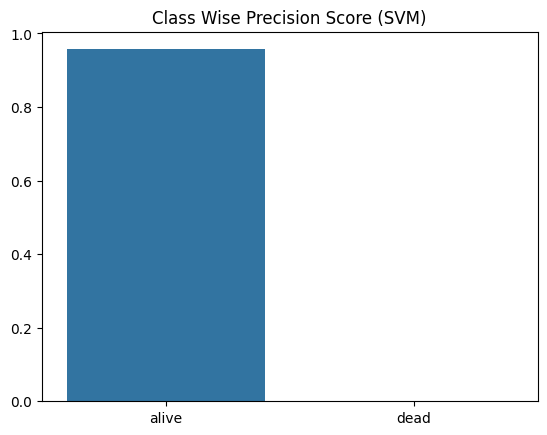

In [ ]:
if categorical_target_column:
  clf = SVC()
  clf.fit( X_train , y_train )
  y_pred = clf.predict( X_test )

  print( classification_report( y_test , y_pred ) )

  matrix = confusion_matrix( y_test , y_pred )
  sns.heatmap( matrix )
  plt.show()

  sns.barplot( x = target_class ,y = recall_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Recall Score (SVM)")
  plt.show()

  sns.barplot( x = target_class ,y = precision_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Precision Score (SVM)")
  plt.show()

else:
  #apply linear regression . As shown in lab
  print("You Need to use Linear Regression as your target column in Numeric")

OBSERVATION

---


An analysis of the evaluation metrics reveals a significant discrepancy in recall scores between the two classes. Class "1" exhibits a recall of 0.00, while class "0" demonstrates a substantially higher recall of 1.00. This disparity suggests that the model is underperforming in its ability to accurately identify instances belonging to class "0." Conversely, it demonstrates a greater proficiency in correctly classifying instances within class "1."

*This is just a sample analysis.*

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2484
           1       0.07      0.08      0.08       112

    accuracy                           0.91      2596
   macro avg       0.51      0.52      0.52      2596
weighted avg       0.92      0.91      0.92      2596



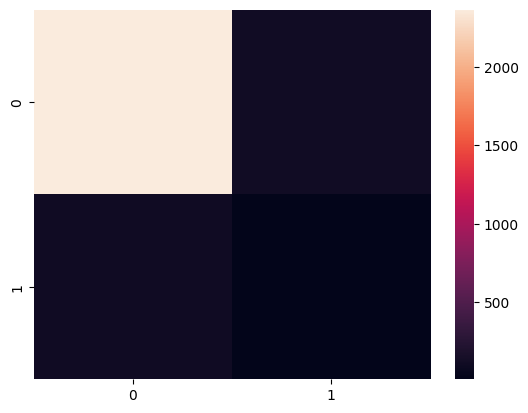

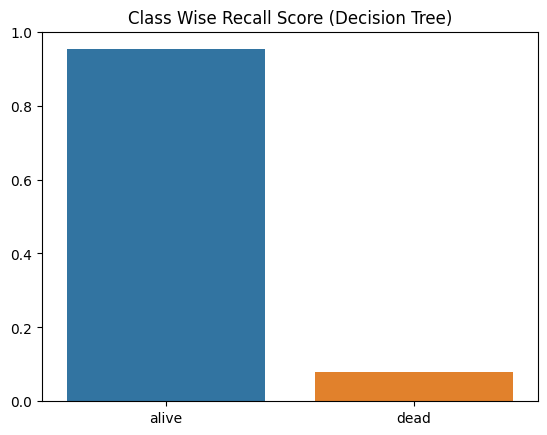

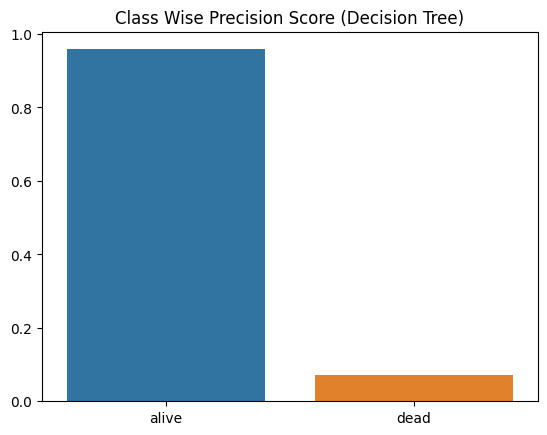

In [ ]:
if categorical_target_column:
  clf = tree.DecisionTreeClassifier()
  clf.fit( X_train , y_train )
  y_pred = clf.predict( X_test )

  print( classification_report( y_test , y_pred ) )

  matrix = confusion_matrix( y_test , y_pred )
  sns.heatmap( matrix )
  plt.show()

  sns.barplot( x = target_class ,y = recall_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Recall Score (Decision Tree)")
  plt.show()

  sns.barplot( x = target_class ,y = precision_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Precision Score (Decision Tree)")
  plt.show()

else:
  #apply linear regression . As shown in lab
  print("You Need to use Linear Regression as your target column in Numeric")

OBSERVATION

---

The decision tree model applied to the Titanic dataset achieved an overall accuracy of 91%. It showed higher precision (correct positive predictions among predicted positives) for alive (96%) compared to those who dead (7%). The recall (true positive rate) was higher for alive (95%) compared to those who died (8%). The F1-score, a balanced metric considering precision and recall, was 0.96 for class 0 and 0.08 for class 1.



*This is just a sample analysis.*